In [1]:
!unzip BERT-Sentiment-Analysis.zip -d '.'

In [2]:
cd BERT-Sentiment-Analysis

/content/BERT-Sentiment-Analysis


In [3]:
ls

cm.py          LICENSE           __pycache__/  test_sentiment.py
data/          notebook/         README.md     test_utility.py
dataset.py     output/           sentiment.py  utility.py
evaluation.py  preprocessing.py  shared/       visualization.py


In [4]:
# install required libraries
# transformers
# torch
# sklearn
# seaborn

In [5]:
!pip3 install transformers

In [6]:
!pip3 install torch

In [7]:
!pip3 install sklearn

In [8]:
!pip3 install seaborn

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from evaluation import Evaluation

In [10]:
df = pd.read_csv('/content/BERT-Sentiment-Analysis/data/google_play_reviews/dataset.csv')

In [11]:
# check dataframe
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHNHm4OfbjkxEXXa51JwZEHAaDlvfSgN0OU256...,Lex S,https://play-lh.googleusercontent.com/-FgDpDeE...,"I love this app, but I do have one major gripe...",1,124,5.2.0.23,2020-08-05 18:22:04,"We ensured that Any.do would be fairly priced,...",2020-08-10 09:41:21,most_relevant,com.anydo
1,gp:AOqpTOHB6-9UnF_GWUDr3szAVvXyvUp1OxNxBenTjog...,Colleen Wallace,https://lh3.googleusercontent.com/a-/AOh14Gjzg...,Update ruined app Last update re-formatted the...,1,61,5.4.0.6,2020-09-07 21:02:48,We are doing all we can to respond to all of o...,2020-09-08 09:58:44,most_relevant,com.anydo
2,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://play-lh.googleusercontent.com/-pO3wTIb...,"Trash. Yes, it has some nice nifty features bu...",1,30,5.2.0.23,2020-07-22 00:17:25,"Premium users can edit, create and delete tags...",2020-07-23 17:57:51,most_relevant,com.anydo
3,gp:AOqpTOGCGOEcZNh7qvxq32YqKUPPFuZm-jMfFQn8HDe...,Alessandro Frul,https://lh3.googleusercontent.com/-ampdq6QXuzc...,"It doesn't have sub lists, e.g. ""child/school""...",1,10,5.5.0.8,2020-09-21 07:46:29,"Any.do is a minimalist task manager, which ref...",2020-09-23 08:21:13,most_relevant,com.anydo
4,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,13,5.2.0.23,2020-07-22 09:23:35,The Premium ad only shows up when first openin...,2020-07-23 18:20:43,most_relevant,com.anydo


In [12]:
df = df.rename(columns={'content': 'text'})

In [13]:
df.head()

,reviewId,userName,userImage,text,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHNHm4OfbjkxEXXa51JwZEHAaDlvfSgN0OU256...,Lex S,https://play-lh.googleusercontent.com/-FgDpDeE...,"I love this app, but I do have one major gripe...",1,124,5.2.0.23,2020-08-05 18:22:04,"We ensured that Any.do would be fairly priced,...",2020-08-10 09:41:21,most_relevant,com.anydo
1,gp:AOqpTOHB6-9UnF_GWUDr3szAVvXyvUp1OxNxBenTjog...,Colleen Wallace,https://lh3.googleusercontent.com/a-/AOh14Gjzg...,Update ruined app Last update re-formatted the...,1,61,5.4.0.6,2020-09-07 21:02:48,We are doing all we can to respond to all of o...,2020-09-08 09:58:44,most_relevant,com.anydo
2,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://play-lh.googleusercontent.com/-pO3wTIb...,"Trash. Yes, it has some nice nifty features bu...",1,30,5.2.0.23,2020-07-22 00:17:25,"Premium users can edit, create and delete tags...",2020-07-23 17:57:51,most_relevant,com.anydo
3,gp:AOqpTOGCGOEcZNh7qvxq32YqKUPPFuZm-jMfFQn8HDe...,Alessandro Frul,https://lh3.googleusercontent.com/-ampdq6QXuzc...,"It doesn't have sub lists, e.g. ""child/school""...",1,10,5.5.0.8,2020-09-21 07:46:29,"Any.do is a minimalist task manager, which ref...",2020-09-23 08:21:13,most_relevant,com.anydo
4,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,13,5.2.0.23,2020-07-22 09:23:35,The Premium ad only shows up when first openin...,2020-07-23 18:20:43,most_relevant,com.anydo


In [14]:
# next, get sentiment label for each review in numeric format
def to_label(rating):
    rating = int(rating)
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

In [15]:
df['label'] = df['score'].apply(to_label)

In [16]:
df.head()

,reviewId,userName,userImage,text,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,label
0,gp:AOqpTOHNHm4OfbjkxEXXa51JwZEHAaDlvfSgN0OU256...,Lex S,https://play-lh.googleusercontent.com/-FgDpDeE...,"I love this app, but I do have one major gripe...",1,124,5.2.0.23,2020-08-05 18:22:04,"We ensured that Any.do would be fairly priced,...",2020-08-10 09:41:21,most_relevant,com.anydo,negative
1,gp:AOqpTOHB6-9UnF_GWUDr3szAVvXyvUp1OxNxBenTjog...,Colleen Wallace,https://lh3.googleusercontent.com/a-/AOh14Gjzg...,Update ruined app Last update re-formatted the...,1,61,5.4.0.6,2020-09-07 21:02:48,We are doing all we can to respond to all of o...,2020-09-08 09:58:44,most_relevant,com.anydo,negative
2,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://play-lh.googleusercontent.com/-pO3wTIb...,"Trash. Yes, it has some nice nifty features bu...",1,30,5.2.0.23,2020-07-22 00:17:25,"Premium users can edit, create and delete tags...",2020-07-23 17:57:51,most_relevant,com.anydo,negative
3,gp:AOqpTOGCGOEcZNh7qvxq32YqKUPPFuZm-jMfFQn8HDe...,Alessandro Frul,https://lh3.googleusercontent.com/-ampdq6QXuzc...,"It doesn't have sub lists, e.g. ""child/school""...",1,10,5.5.0.8,2020-09-21 07:46:29,"Any.do is a minimalist task manager, which ref...",2020-09-23 08:21:13,most_relevant,com.anydo,negative
4,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,13,5.2.0.23,2020-07-22 09:23:35,The Premium ad only shows up when first openin...,2020-07-23 18:20:43,most_relevant,com.anydo,negative


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'sentiment')

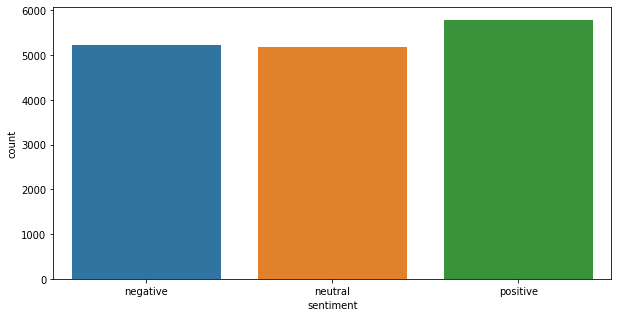

In [17]:
# check data distribution
ax = sns.countplot(df.label)
plt.xlabel('sentiment')

In [18]:
df.columns.tolist()

['reviewId',
 'userName',
 'userImage',
 'text',
 'score',
 'thumbsUpCount',
 'reviewCreatedVersion',
 'at',
 'replyContent',
 'repliedAt',
 'sortOrder',
 'appId',
 'label']

In [19]:
# drop unused columns
df.drop(
    [
      'reviewId',
      'userName',
      'userImage',
      'score',
      'thumbsUpCount',
      'reviewCreatedVersion',
      'at',
      'replyContent',
      'repliedAt',
      'sortOrder',
      'appId'
    ],
    axis=1,
    inplace=True
)

In [20]:
df.head()

,text,label
0,"I love this app, but I do have one major gripe...",negative
1,Update ruined app Last update re-formatted the...,negative
2,"Trash. Yes, it has some nice nifty features bu...",negative
3,"It doesn't have sub lists, e.g. ""child/school""...",negative
4,"OMG the UI is awful, seriously you have popup ...",negative


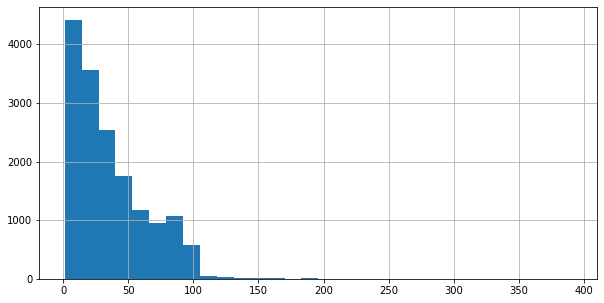

In [21]:
# check sequence length distribution
sentences = df['text'].tolist()
seq_len = [len(sentence.split()) for sentence in sentences]
pd.Series(seq_len).hist(bins=30)

In [22]:
df.dropna(inplace=True)

In [23]:
ev = Evaluation(lang_code='en', method='BERT', version='1.1', epochs=10, batch_size=16)

In [24]:
ev.create_model(df=df, max_length=128, output_path='output')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1 / 10
----------
Train loss 0.6877870853735041 accuracy 0.7013147381419336
Val loss 0.674528809656438 accuracy 0.7255144032921811

Epoch 2 / 10
----------
Train loss 0.3926107639405751 accuracy 0.8559599041185443
Val loss 0.7082493679696008 accuracy 0.7522633744855967

Epoch 3 / 10
----------
Train loss 0.22771041624574695 accuracy 0.9270719837292075
Val loss 0.9313916989761454 accuracy 0.782716049382716

Epoch 4 / 10
----------
Train loss 0.15551971042751572 accuracy 0.9557637829592504
Val loss 1.1012497155093832 accuracy 0.776954732510288

Epoch 5 / 10
----------
Train loss 0.10169241704659496 accuracy 0.9723977627660346
Val loss 1.2382761133002962 accuracy 0.7847736625514403

Epoch 6 / 10
----------
Train loss 0.06918517040365546 accuracy 0.9802426091377933
Val loss 1.2956362314285605 accuracy 0.7983539094650206

Epoch 7 / 10
----------
Train loss 0.053316348124702186 accuracy 0.9840197573908621
Val loss 1.3085700656152575 accuracy 0.8012345679012346

Epoch 8 / 10
----------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [27]:
cd BERT-Sentiment-Analysis

[Errno 2] No such file or directory: 'BERT-Sentiment-Analysis'
/content/BERT-Sentiment-Analysis


In [30]:
!zip -r /content/BERT-Sentiment-Analysis/output/output.zip '.'

  adding: sentiment.py (deflated 75%)
  adding: utility.py (deflated 73%)
  adding: .DS_Store (deflated 91%)
  adding: evaluation.py (deflated 75%)
  adding: test_utility.py (deflated 78%)
  adding: README.md (stored 0%)
  adding: output/ (stored 0%)
  adding: output/label_desc/ (stored 0%)
  adding: output/label_desc/en_BERT_1.1/ (stored 0%)
  adding: output/label_desc/en_BERT_1.1/label_desc.json (deflated 29%)
  adding: output/evaluation/ (stored 0%)
  adding: output/evaluation/en_BERT_1.1/ (stored 0%)
  adding: output/evaluation/en_BERT_1.1/test_dist.png (deflated 24%)
  adding: output/evaluation/en_BERT_1.1/train_dist.png (deflated 24%)
  adding: output/evaluation/en_BERT_1.1/confusion_matrix.png (deflated 9%)
  adding: output/evaluation/en_BERT_1.1/data_dist.png (deflated 24%)
  adding: output/evaluation/en_BERT_1.1/seq_length.png (deflated 26%)
  adding: output/evaluation/en_BERT_1.1/classification_report.txt (deflated 62%)
  adding: output/evaluation/en_BERT_1.1/train_history.pn